In [1]:
from engine import Value
from nn import Layer, Sigmoid
import random
import math
from fastbook import *

In [26]:
x = torch.linspace(1, 500, 500)
ya = tensor([math.sin(_+10) for _ in range(500)])

In [27]:
xc = [i+1 for i in range(500)]
yac = [math.sin(_+10) for _ in range(500)]


In [36]:
model = Layer(500, 20, nl=True
)
out = Layer(20, 500, nl=False
              )

#lin2 = Layer(100, 20, nl=False)

<h5><b>Its not working the loss is just exploding. Why?</b></h5>

<p>Changing the activation function to <code>Tanh</code>, adding another linear layer without activation and it works. The second layers used to reprocess the non=linearity learned by the first layer</p>

In [43]:
for _ in range(20):
        y = model(x)
        y = out(y)
        loss = sum((y-yac)**2 for y,yac in zip(y,yac))/len(y)
        print(f'loss = {loss}')
        loss.backward()
        
        for p in model.parameters():
            p.data -= 0.1*p.grad

        for p in out.parameters():
            p.data -= 0.1*p.grad
        model.zero_grad()
        out.zero_grad()


loss = Value(data=1.384268748554868, grad=0)
loss = Value(data=1.3611107075820432, grad=0)
loss = Value(data=1.3383400876661924, grad=0)
loss = Value(data=1.315950407469988, grad=0)
loss = Value(data=1.2939352940852415, grad=0)
loss = Value(data=1.2722884812189617, grad=0)
loss = Value(data=1.251003807409716, grad=0)


In [42]:
y[0].data,yac[0]

(-1.9199235214286436, -0.5440211108893698)

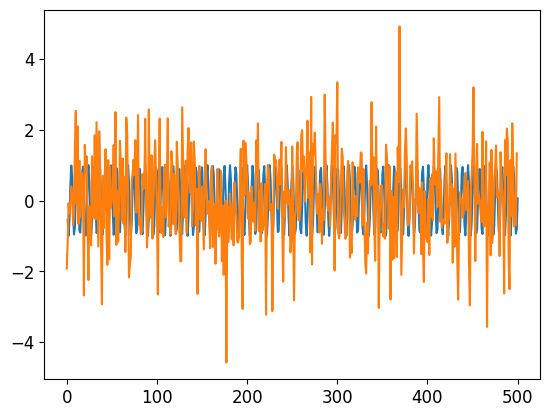

In [38]:
plt.plot(x,yac,[y.data for y in y])

In [ ]:
y

[Value(data=997542997262336.0, grad=1995085994524672.0),
 Value(data=6318507851513856.0, grad=1.2637015703027712e+16),
 Value(data=505119292522496.0, grad=1010238585044992.0),
 Value(data=-20329101524992.0, grad=-40658203049984.0),
 Value(data=106280828010496.0, grad=212561656020992.0),
 Value(data=1443233968160768.0, grad=2886467936321536.0),
 Value(data=-1717849882099712.0, grad=-3435699764199424.0),
 Value(data=-902574895005696.0, grad=-1805149790011392.0),
 Value(data=-3704132535844864.0, grad=-7408265071689728.0),
 Value(data=-19887200141312.0, grad=-39774400282624.0),
 Value(data=3114808798871552.0, grad=6229617597743104.0),
 Value(data=-202578071650304.0, grad=-405156143300608.0),
 Value(data=5133963924340736.0, grad=1.0267927848681472e+16),
 Value(data=-787959196418048.0, grad=-1575918392836096.0),
 Value(data=-3097352978038784.0, grad=-6194705956077568.0),
 Value(data=101814372401152.0, grad=203628744802304.0),
 Value(data=2421099102994432.0, grad=4842198205988864.0),
 Value(d

In [ ]:
lin1 = nn.Linear(500, 500, dtype=torch.float32)

In [ ]:
opt = torch.optim.Adam(lin1.parameters(), lr=0.01)


In [ ]:
for _ in range(1000):
    y = lin1(x)
    loss = F.mse_loss(y,ya)
    loss.backward()
    opt.step()
    opt.zero_grad()

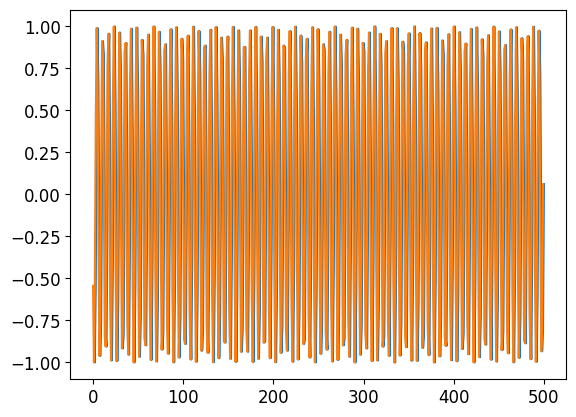

In [ ]:
plt.plot(x,ya,y.detach().numpy())